In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.feature_selection import VarianceThreshold
from sklearn import tree


import matplotlib.pyplot as plt
import seaborn as sns

from scipy.fftpack import fft, ifft

In [2]:
#data = pd.read_csv("../dat5/data5.csv", header=None)
data = pd.read_csv("../random6/all.csv", header=None)
# data = pd.read_csv("../transformed/data_8/all.csv", header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,21599,21600,21601,21602,21603,21604,21605,21606,21607,21608
0,29,0.10,0.032454,0.511259,0.000064,0.509840,0.000082,0.509210,0.000069,0.000029,...,0.000011,0.000023,0.000037,0.000024,0.000003,-0.000016,-0.000020,-0.000016,-0.000030,-0.000051
1,17,0.03,0.018505,0.517757,0.001553,0.509868,0.000090,0.509245,0.000072,-0.000770,...,-0.000017,-0.000002,-0.000005,-0.000007,0.000003,0.000014,0.000004,-0.000002,-0.000009,0.000011
2,16,0.10,0.002759,0.518099,0.000789,0.509872,0.000089,0.509248,0.000072,-0.000101,...,0.000012,-0.000007,-0.000021,-0.000013,0.000002,0.000001,-0.000001,-0.000007,-0.000017,-0.000036
3,933,0.03,0.000424,0.511818,0.000160,0.509837,0.000077,0.509164,0.000066,-0.000102,...,0.000007,0.000013,-0.000003,-0.000029,-0.000042,-0.000014,0.000017,0.000024,0.000014,-0.000023
4,904,0.17,0.004941,0.514841,0.000442,0.509872,0.000083,0.509224,0.000070,-0.000339,...,0.000010,-0.000008,-0.000001,0.000019,0.000030,0.000011,-0.000006,0.000010,0.000005,0.000015


In [4]:
zer = pd.DataFrame({i: [0.0 for _ in range(len(data))] for i in range(50000, 50496)})

In [5]:
# Fourier transform the channel data
# Zero pad out to 4096 to be a power of 2
df = data.ix[:,:8]

for c in range(3):
    for d in range(2):
        dat = data.ix[:,(9 + (2*c+d)*3600):(8 + (2*c+d+1)*3600)].join(zer)  # padding
        df1 = pd.DataFrame(np.abs(fft(dat)), columns=range((9 + (2*c+d)*4096),(9 + (2*c+d+1)*4096)))
        df1 = df1.ix[:, (9 + (2*c+d)*4096):((8 + (2*c+d)*4096) + 2048)]
        df = df.join(df1)

data2 = df
data2.columns = range(len(data2.columns))

In [6]:
len(data2.transpose())

12297

In [7]:
len(data2)

1297

In [8]:
# Integrate frequencies every 32, amounting to 64 points per channel data

df = data2.ix[:,:8]

int_freqs_map = {}

for row in range(len(data2)):
    int_freqs = []
    offset = 9
    tot = 0.0
    for c in range(3):
        for d in range(2):
            for i, val in enumerate(pd.Series.tolist(data2.ix[row, offset:(offset + 2048 - 1)])):
                tot += val
                if (i+1) % 32 == 0:
                    int_freqs.append(tot)
                    tot = 0.0
            offset += 2048
    int_freqs_map[row] = int_freqs
    
df = pd.DataFrame(int_freqs_map).transpose()
df.columns = range(9, 9+len(df.columns))
data3 = data2.ix[:,:8].join(df)

In [9]:
data3.head()

,0,1,2,3,4,5,6,7,8,9,...,383,384,385,386,387,388,389,390,391,392
0,29,0.10,0.032454,0.511259,0.000064,0.509840,0.000082,0.509210,0.000069,0.280360,...,0.003832,0.004234,0.003725,0.003142,0.003135,0.002722,0.001964,0.001721,0.001376,0.001291
1,17,0.03,0.018505,0.517757,0.001553,0.509868,0.000090,0.509245,0.000072,10.182152,...,0.005254,0.004564,0.004570,0.002951,0.002588,0.002225,0.001749,0.001526,0.001094,0.000845
2,16,0.10,0.002759,0.518099,0.000789,0.509872,0.000089,0.509248,0.000072,8.141686,...,0.004615,0.004738,0.003410,0.003436,0.003049,0.002547,0.001910,0.001605,0.001234,0.001182
3,933,0.03,0.000424,0.511818,0.000160,0.509837,0.000077,0.509164,0.000066,1.044366,...,0.004844,0.004503,0.003733,0.003776,0.002960,0.002266,0.001785,0.001585,0.001243,0.001163
4,904,0.17,0.004941,0.514841,0.000442,0.509872,0.000083,0.509224,0.000070,4.295723,...,0.005202,0.004035,0.003996,0.003046,0.002411,0.002478,0.002174,0.001490,0.001096,0.000927


In [11]:
# Write to disk
# data3.to_csv("../data_4/pos_data_transformed.csv")
data3.to_csv("../transformed/random6/pos_data_transformed.csv")

In [70]:
len(dff.transpose())

609

In [55]:
len(data3.transpose())

393

In [66]:
9 + 64*6

393

In [95]:
dff.transpose().ix[600:, :]

,0,1,2,3,4,5,6
600,0.000642,0.000229,0.000429,0.000264,0.003432,0.000297,0.000742
601,0.000601,0.000229,0.000437,0.000229,0.003289,0.000264,0.000726
602,0.000427,0.000170,0.000318,0.000372,0.003125,0.000217,0.000615
603,0.000485,0.000114,0.000250,0.000160,0.002489,0.000160,0.000517
604,0.000282,0.000156,0.000203,0.000157,0.002024,0.000151,0.000435
605,0.000210,0.000082,0.000412,0.000101,0.001403,0.000120,0.000336
606,0.000184,0.000063,0.000251,0.000084,0.001224,0.000068,0.000298
607,0.000129,0.000038,0.000076,0.000055,0.000558,0.000053,0.000236
608,0.000053,0.000013,0.000023,0.000017,0.000248,0.000014,0.000043


In [94]:
data3.transpose().ix[600:, :]

,0,1,2,3,4,5,6
600,0.000642,0.000229,0.000429,0.000264,0.003432,0.000297,0.000742
601,0.000601,0.000229,0.000437,0.000229,0.003289,0.000264,0.000726
602,0.000427,0.000170,0.000318,0.000372,0.003125,0.000217,0.000615
603,0.000485,0.000114,0.000250,0.000160,0.002489,0.000160,0.000517
604,0.000282,0.000156,0.000203,0.000157,0.002024,0.000151,0.000435
605,0.000210,0.000082,0.000412,0.000101,0.001403,0.000120,0.000336
606,0.000184,0.000063,0.000251,0.000084,0.001224,0.000068,0.000298
607,0.000129,0.000038,0.000076,0.000055,0.000558,0.000053,0.000236
608,0.000053,0.000013,0.000023,0.000017,0.000248,0.000014,0.000043


In [97]:
diff = data3 - dff

In [98]:
diff.transpose().ix[200:250]

,0,1,2,3,4,5,6
200,2.398333e-10,2.412092e-10,-3.615968e-09,4.392470e-09,-8.035714e-11,-4.617742e-10,-2.376592e-10
201,9.622571e-10,-1.807309e-10,-1.145714e-09,-1.956827e-10,-6.636262e-10,5.997238e-11,4.054234e-09
202,-2.682290e-10,3.619155e-10,-1.478091e-11,1.522520e-10,-1.012400e-09,4.571852e-10,4.976468e-10
203,-4.060653e-10,-4.229807e-11,4.789438e-10,1.133494e-10,-4.615208e-10,-4.687914e-10,1.867096e-10
204,2.666775e-10,-8.435140e-11,3.838937e-10,1.107431e-10,-3.800477e-10,-2.856302e-10,1.383315e-11
205,9.464826e-11,-4.277352e-10,2.873713e-10,-1.752414e-10,1.585381e-10,4.712697e-10,-4.329696e-10
206,-3.418466e-10,4.025362e-10,-3.611067e-10,2.725954e-10,5.180910e-11,-2.164959e-10,4.787173e-10
207,-3.360500e-10,-2.394305e-10,-2.611525e-10,3.425693e-10,3.285727e-10,8.949571e-12,2.560509e-10
208,3.753930e-11,-3.702798e-11,-3.264973e-11,-3.264845e-11,-1.134118e-12,1.213026e-11,8.405127e-13
209,4.975146e-07,-1.877669e-07,3.601222e-07,-1.537146e-07,1.455793e-07,3.154809e-07,1.901050e-08


In [9]:
positives = data3[data3[0] == 1]
negatives = data3[data3[0] == 0]
positives_sub = positives[:16]
positives_sub_comp = positives[16:]

In [26]:
len(positives)

39

In [10]:
positives.index

Int64Index([   5,  144,  239,  325,  433,  525,  612,  653,  773,  929, 1001,
            1130, 1240, 1278, 1431, 1494, 1572, 1713, 1756, 1815, 1914, 2030,
            2176, 2252, 2364, 2381, 2479, 2580, 2701, 2777, 2869, 2983, 3114,
            3155, 3226, 3304, 3380, 3425, 3506],
           dtype='int64')

In [13]:
# Bootstrap samples
n = 20

# sample_positives = positives.sample(n, replace=True)
sample_positives = positives_sub.sample(n, replace=True)
sample_negatives = negatives.sample(n, replace=True)
df = sample_positives.append(sample_negatives)

In [11]:
clf = linear_model.LogisticRegression()

In [15]:
X = df[df.columns[1:]]
y = df[0]

Xall = data3[data3.columns[1:]]
yall = data3[0]

In [16]:
model = clf.fit(X, y)
model.score(X, y)

0.90000000000000002

In [17]:
model.score(Xall, yall)

0.54201917653694298

In [18]:
model.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1])

In [83]:
Xt = model.transform(X)

In [19]:
dlf = tree.DecisionTreeClassifier()
tmodel = dlf.fit(X, y)
tmodel.score(X, y)

1.0

In [20]:
tmodel.score(Xall, yall)

0.69120135363790192

In [21]:
x = tmodel.feature_importances_.tolist()
xmap = {i: val for i, val in enumerate(x) if val > 0.00001}
xmap

{14: 0.175, 77: 0.375, 216: 0.3, 332: 0.15}

In [128]:
tmodel.score(positives_sub_comp[positives_sub_comp.columns[1:]], positives_sub_comp[0])

0.375

In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rmodel = rfc.fit(X, y)
rmodel.score(X, y)
print(rmodel.score(Xall, yall))
x = rmodel.feature_importances_.tolist()
z = [(val, i) for i, val in enumerate(x)]
z.sort(reverse=True)
z[:50]

0.724478285392


[(0.01617766987212532, 408),
 (0.014514666669192884, 415),
 (0.013533349908840184, 520),
 (0.013231710775264263, 513),
 (0.01303170837609585, 186),
 (0.012271676348093351, 515),
 (0.012061130611294385, 323),
 (0.011574278834340755, 216),
 (0.011510738601865671, 412),
 (0.010735548018087113, 83),
 (0.010155601454228457, 219),
 (0.009863149897334266, 91),
 (0.009737191569676857, 421),
 (0.009405317942714665, 498),
 (0.00896134368201184, 177),
 (0.008598766121436898, 82),
 (0.008523944109334726, 179),
 (0.008389996034633435, 522),
 (0.008247363678595007, 413),
 (0.008014844589659504, 190),
 (0.007771468243451504, 76),
 (0.007436724261596208, 599),
 (0.007291516554663729, 211),
 (0.007287049675953621, 416),
 (0.007202429916792549, 332),
 (0.007094993742590997, 77),
 (0.006940585080935957, 183),
 (0.006931143787457358, 388),
 (0.006728542750150672, 79),
 (0.006585677278190306, 312),
 (0.006503934661829398, 511),
 (0.006410609857978279, 84),
 (0.0064080668843826735, 546),
 (0.006180826020838

In [317]:
X.head()

,1,2,3,4,5,6,7,8,9,10,...,10805,10806,10807,10808,10809,10810,10811,10812,10813,10814
28,0.40,0.002881,0.510160,0.000737,0.512901,0.000428,0.516843,0.000371,2.161444e-14,0.014338,...,0.000008,0.000001,0.000008,0.000004,0.000002,0.000003,0.000002,0.000002,9.588947e-07,1.192622e-18
121,0.33,0.002381,0.509325,0.002736,0.509667,0.003576,0.510037,0.000576,9.215545e-14,0.003353,...,0.000035,0.000043,0.000037,0.000022,0.000021,0.000012,0.000008,0.000008,6.032966e-06,8.673617e-19
110,0.30,0.000604,0.495164,0.002904,0.508221,0.000349,0.509962,0.000059,7.731663e-15,5.388324,...,0.000013,0.000003,0.000008,0.000002,0.000007,0.000008,0.000002,0.000001,2.584521e-06,5.421011e-20
23,0.30,0.000609,0.509555,0.000106,0.509363,0.000090,0.509337,0.000067,1.652019e-13,0.010762,...,0.000004,0.000006,0.000002,0.000002,0.000004,0.000005,0.000002,0.000001,5.326804e-07,3.794708e-19
57,0.07,0.000875,0.510063,0.000479,0.510109,0.000328,0.508715,0.000393,9.592587e-14,0.036063,...,0.000112,0.000072,0.000078,0.000042,0.000067,0.000021,0.000015,0.000006,9.121620e-06,8.673617e-19


In [ ]:
# More systematic bootstrapping/feature engineering

In [27]:
# Bootstrap samples
n = 25
scale = 10
n_iters = 500

n_features = len(df.columns[1:])
feature_aggregate = [0.0 for _ in range(n_features)]
for it in range(n_iters):
    
    sample_positives = positives.sample(n, replace=True)
    # sample_positives = positives_sub.sample(n, replace=True)
    sample_negatives = negatives.sample(n*scale, replace=True)
    df = sample_positives.append(sample_negatives)

    X = df[df.columns[1:]]
    y = df[0]

    dlf = tree.DecisionTreeClassifier(class_weight={0: 0.2, 1: 1.0})
    tmodel = dlf.fit(X, y)
    all_score = tmodel.score(Xall, yall)
#     print(it, all_score)

    x = tmodel.feature_importances_.tolist()
    for i in range(len(x)):
        feature_aggregate[i] += all_score * x[i]


# Compute mean
feature_aggregate = [f/n_iters for f in feature_aggregate]
        
# Get aggregrate feature scores 
xmap = {i: val for i, val in enumerate(feature_aggregate) if val > 0.005}
#xmap

z = [(val, i) for i, val in enumerate(feature_aggregate)]
z.sort(reverse=True)
z[:50]


[(0.026959644471933504, 1),
 (0.024438986913503435, 2),
 (0.0242066076423114, 4),
 (0.022944128825188953, 6),
 (0.019795409499801155, 217),
 (0.016281452882386582, 312),
 (0.015194309980027637, 3),
 (0.012457159017724725, 0),
 (0.012324765313295068, 108),
 (0.010720492498152524, 408),
 (0.0098304722928051879, 308),
 (0.0090532012507368188, 317),
 (0.0081096653811813038, 508),
 (0.0074597303707674935, 440),
 (0.0073468970053114568, 329),
 (0.0071123733793914653, 208),
 (0.0069967780899132187, 10),
 (0.0069903110842366801, 212),
 (0.0064368927143733119, 115),
 (0.0064174251701367971, 8),
 (0.0062092873042494641, 310),
 (0.005628434452958379, 367),
 (0.0055926126805914671, 510),
 (0.0054735124160010295, 509),
 (0.0054230563880193292, 209),
 (0.0053997581857406921, 211),
 (0.0049342871245736898, 410),
 (0.004925892848714703, 110),
 (0.0047889384115677117, 5),
 (0.0045398583010787079, 311),
 (0.0044783291919486276, 540),
 (0.0044683292811350294, 309),
 (0.0044148965800612262, 231),
 (0.0043

In [62]:
len(positives.transpose())

609

In [63]:
xmap

{0: 0.0060086623401086076,
 1: 0.018413369238687666,
 2: 0.032829942696694391,
 3: 0.011334787273096964,
 4: 0.028955231145712516,
 5: 0.0052794334467029967,
 6: 0.026239905569094064,
 8: 0.0088022328307727077,
 108: 0.019836298584714213,
 110: 0.0072608741940490976,
 140: 0.0062047957781329556,
 177: 0.0052236926934191375,
 209: 0.0054407344712965947,
 210: 0.0051089399766387116,
 211: 0.0061350914019779618,
 217: 0.011173968813640965,
 231: 0.0077905949748645394,
 267: 0.0071424948321698427,
 308: 0.0070359872468004755,
 309: 0.0071307664535819586,
 312: 0.016078333192440154,
 367: 0.0084554999586007717,
 408: 0.01098906553901543,
 418: 0.0053282860487068101,
 508: 0.0064933664397804746,
 509: 0.0086814957487643257,
 540: 0.0083223078636067722}

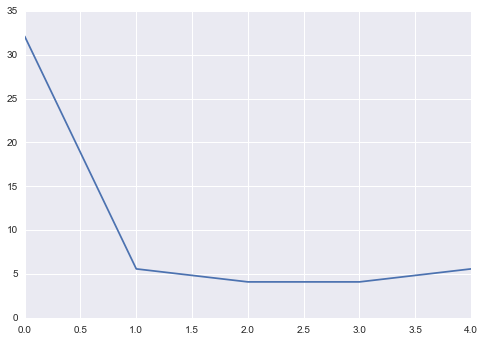

In [4]:
data = [5.5, 6.5, 7.8, 9.0, 3.3]
ft = fft(data)
plt.plot(np.abs(ft))

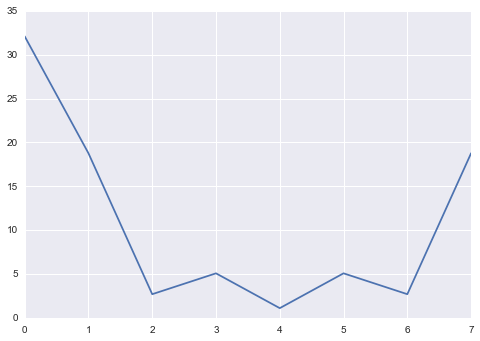

In [5]:
data = [5.5, 6.5, 7.8, 9.0, 3.3, 0.0, 0.0, 0.0]
ft = fft(data)
plt.plot(np.abs(ft))

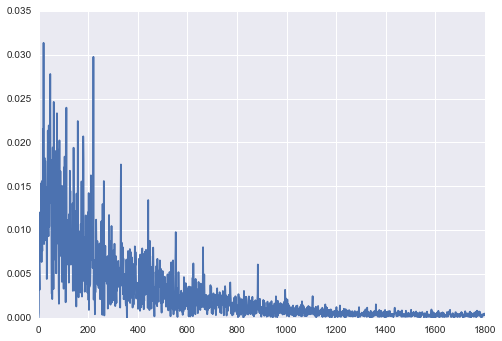

In [13]:
ft = fft(data.ix[0, 9:3609])[:1800]
plt.plot(np.abs(ft))

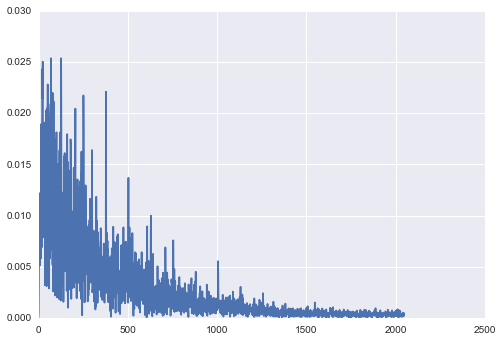

In [32]:
dat = pd.Series.tolist(data.ix[0, 9:3608]) + [0.0 for _ in range(4096-3600)]
ft = fft(dat)[:2048]
plt.plot(np.abs(ft))

In [25]:
len(dat)

4096

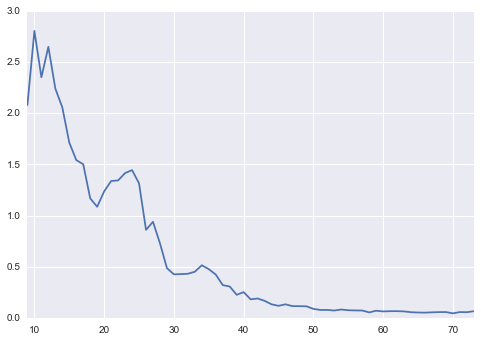

In [62]:
data3.ix[21, 9:(9+64)].plot()

In [2]:
fft([1, 2, 3, 4, 5, 6, 7, 8])

array([ 36.+0.j        ,  -4.+9.65685425j,  -4.+4.j        ,
        -4.+1.65685425j,  -4.+0.j        ,  -4.-1.65685425j,
        -4.-4.j        ,  -4.-9.65685425j])